In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import scipy.stats as st
from scipy.stats import spearmanr
from scipy.stats import ks_2samp


## Corrélation sans les clients bussiness
### Variable quantitative / quantitative 
###  

In [2]:
sns.set( 
    style='whitegrid',
    context='notebook',
    palette=['#c2a87c','#423217','#8F7C5B','#423A2A','#CC9B45'],
    rc={'figure.figsize':(14,6),'axes.facecolor':'grey', 'figure.facecolor':'grey'})

In [3]:
t_b2b= pd.read_csv('/home/david/OC/P6_Terrasson_David/cours_annexes/t_b2b.csv',index_col='date')
t_b2c= pd.read_csv('/home/david/OC/P6_Terrasson_David/cours_annexes/t_b2c.csv',index_col='date')
global_t= pd.read_csv('/home/david/OC/P6_Terrasson_David/cours_annexes/global_t.csv',index_col='date')
global_t_client= pd.read_csv('/home/david/OC/P6_Terrasson_David/cours_annexes/global_t_client.csv')

In [4]:
business =['c_1609','c_6714','c_3454','c_4958']
global_t_client_c= global_t[~global_t['client_id'].isin(business)]
global_t_client_c.head(2)

session_id  month  month_part  weekday  hour  \
date                                                                      
2021-03-22 01:40:22.782925     s_9707      3           2        0     1   
2023-02-22 01:40:22.782925   s_345108      2           2        2     1   

                           client_id sex   age age_group product_id  price  \
date                                                                         
2021-03-22 01:40:22.782925    c_4410   f  55.0     51-70      1_385  25.99   
2023-02-22 01:40:22.782925    c_4410   f  55.0     51-70      1_385  25.99   

                           price_group  categ  
date                                           
2021-03-22 01:40:22.782925           L    1.0  
2023-02-22 01:40:22.782925           L    1.0

In [5]:
panier_moyen_par_age = global_t_client_c.groupby('age').agg({'price':'mean'}).reset_index()
panier_moyen_par_age.head(2)

age      price
0  18.0  40.201577
1  19.0  40.767737

In [6]:
panier_moyen_par_client = global_t_client_c.groupby('client_id').agg({'price':'mean'}).reset_index()
panier_moyen_par_client.head(2)

client_id      price
0       c_1  14.312308
1      c_10  23.337931

In [7]:
global_t_client['panier_moyen']=round(global_t_client['ca_client']/global_t_client['#_product'])

In [8]:
business =['c_1609','c_6714','c_3454','c_4958']
CA_b2c= global_t_client[~global_t_client['client_id'].isin(business)]
CA_b2c.head(2)

client_id sex  age age_group  #_product  ca_client  panier_moyen
0       c_1   m   67     51-70         39      558.0          14.0
1      c_10   m   66     51-70         58     1354.0          23.0

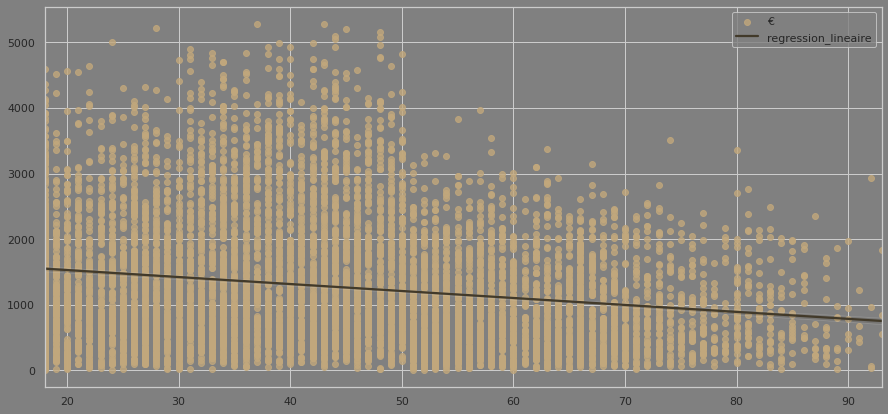

In [9]:
plt.figure(figsize = (15,7))
sns.regplot(x = 'age', y = 'ca_client', data = CA_b2c,line_kws={"color": '#423A2A'})
plt.xlabel('', fontsize = 15)
plt.ylabel('', fontsize = 15)
plt.title('', loc = 'left', fontsize = 20, fontweight = 0)
plt.xlim(min(CA_b2c['age']),max(CA_b2c['age']))
plt.legend(title='',labels=['€','regression_lineaire'])
plt.savefig('CA_age', dpi=300, bbox_inches='tight')

plt.show()

In [10]:
stat, p = spearmanr(CA_b2c["ca_client"], CA_b2c["age"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=-0.185, p=0.000
Probably dependent


### Plus de 5000 valeurs: test Smirnov-Kolgorov

In [11]:
stat, p = ks_2samp(CA_b2c["ca_client"], CA_b2c["age"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.984, p=0.000
Probably dependent


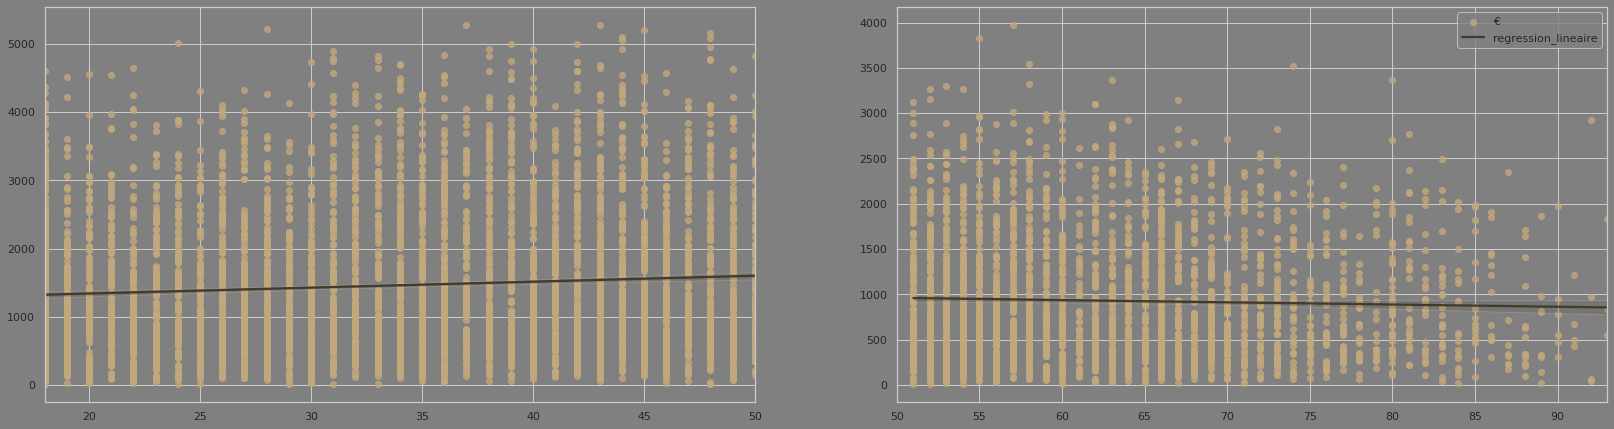

In [12]:
plt.figure(figsize=(28,16))

plt.subplot(2,2,1)
sns.regplot(x = 'age', y = 'ca_client', data = CA_b2c[CA_b2c['age']<=50],line_kws={"color": '#423A2A'})
plt.xlabel('', fontsize = 15)
plt.ylabel('', fontsize = 15)
plt.title('', loc = 'left', fontsize = 20, fontweight = 0)
plt.xlim(min(CA_b2c['age']),50)


plt.subplot(2,2,2)
sns.regplot(x = 'age', y = 'ca_client', data = CA_b2c[CA_b2c['age']>50],line_kws={"color": '#423A2A'})
plt.xlabel('', fontsize = 15)
plt.ylabel('', fontsize = 15)
plt.title('',  fontsize = 20, fontweight = 0)
plt.xlim(50,max(CA_b2c['age']))
plt.legend(loc = 'best',labels=['€','regression_lineaire'])
plt.savefig('CA_age-50-', dpi=300, bbox_inches='tight')

plt.show()

In [13]:
df=CA_b2c[CA_b2c['age']>50]
stat, p = ks_2samp(df["ca_client"], df["age"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.971, p=0.000
Probably dependent


In [16]:
df1=CA_b2c[CA_b2c['age']<=50]
stat, p = ks_2samp(df1["ca_client"], df1["age"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.996, p=0.000
Probably dependent


In [17]:
stat, p = ks_2samp(df1["ca_client"], df1["age"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.996, p=0.000
Probably dependent


https://www.statology.org/kolmogorov-smirnov-test-python/